# Keras tutorial

## Import packages

In [1]:
import numpy as np

## Read file (.csv)

In [2]:
''' Read input files '''
my_data = np.genfromtxt('pkgo.csv',delimiter=',',skip_header=1,dtype='str')
my_data = np.char.strip(my_data,'"').astype(float)
my_data.shape

(1836, 201)

In [3]:
X_train = my_data[:,0:-1]
X_train = X_train.astype('float32')

y_train = my_data[:,-1]
y_train = y_train.astype('int')

## The target looks like that ...
For this dataset, we have 5 classes.

In [4]:
y_train

array([1, 0, 1, ..., 1, 3, 3])

##  Convert to one-hot encoding
If we map these target to indivisual features, it's convenient for training phase. 

In [5]:
from keras.utils import np_utils
Y_train = np_utils.to_categorical(y_train,5)

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


##  Shuffle training data
If the relevance of training data is very high, it will cause the bad result. <br>
Usually, it needs to shuffle the training data.
* **random_state** is the random seed .

In [6]:
from sklearn.utils import shuffle
X_train,Y_train = shuffle(X_train,Y_train,random_state=100)

## Import keras to build a DL model
* Sequential model : https://keras.io/models/sequential/ ( keras Documentation )

In [7]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation

# Loss function
In most learning networks, error is calculated as the **difference** between the **actual** output and the **predicted** output. <br>
The function that is used to compute this error is known as **Loss Function**.<br>
Different loss functions will give different errors for the same prediction, and thus have a considerable effect on the performance of the model.

## Building a model with different loss function

### For classification 
* sparse_categorical_crossentropy
* binary_crossentropy
* **categorical_crossentropy**


![](https://i.imgur.com/JRrmQ3U.png)


reference: http://jackon.me/posts/why-use-cross-entropy-error-for-loss-function/ (神经网络的分类模型 LOSS 函数为什么要用 CROSS ENTROPY)

In [8]:
model_ce = Sequential()
model_ce.add(Dense(128, input_dim=200))
model_ce.add(Activation('sigmoid'))
model_ce.add(Dense(256))
model_ce.add(Activation('sigmoid'))
model_ce.add(Dense(5))
model_ce.add(Activation('softmax'))

### For Regression
* mean_absolute_error
* **mean_squared_error** (common)
* mean_absolute_percentage_error
* mean_squared_logarithmic_error

Here, we will present mean_squared_error (MSE).
![](https://i.imgur.com/pXgMUNr.png)

In [9]:
model_mse = Sequential()
model_mse.add(Dense(128, input_dim=200))
model_mse.add(Activation('sigmoid'))
model_mse.add(Dense(256))
model_mse.add(Activation('sigmoid'))
model_mse.add(Dense(5))
model_mse.add(Activation('softmax'))

## Set up the optimizer
we will talk about the details of optimizer later.

In [10]:
from keras.optimizers import SGD, Adam, RMSprop, Adagrad
sgd = SGD(lr=0.01,momentum=0.0,decay=0.0,nesterov=False)

## Compile model with specified loss and optimizer

### loss with crossentropy

In [11]:
model_ce.compile(loss='categorical_crossentropy',
				optimizer=sgd,
				metrics=['accuracy'])

### loss with mean_squared_error

In [12]:
model_mse.compile(loss= 'mean_squared_error',
              optimizer=sgd,
              metrics=['accuracy'])

## Set the size of mini-batch and number of epochs
* **Batch size** : the number of training **examples** in one forward/backward pass. The higher the batch size, the more memory space you'll need.
* **epoch** : one forward pass and one backward pass of **all** the training examples.
![](https://i.imgur.com/ZokTjAf.png)

In [13]:
batch_size = 16
epochs = 30

## Fit models and use validation_split ＝ 0.1
<br>Float between 0 and 1. The value is set to the proportion of training data to be as validation data.

In [14]:
history_ce = model_ce.fit(X_train, Y_train,
							batch_size=batch_size,
							epochs=epochs,
							verbose=0,
							shuffle=True,
                    		validation_split=0.1)

In [15]:
history_mse = model_mse.fit(X_train, Y_train,
							batch_size=batch_size,
							epochs=epochs,
							verbose=0,
							shuffle=True,
                    		validation_split=0.1)

## Access the loss and accuracy in every epoch

In [16]:
loss_ce	= history_ce.history.get('loss')
acc_ce 	= history_ce.history.get('acc')
loss_mse= history_mse.history.get('loss')
acc_mse = history_mse.history.get('acc')

## Visualization

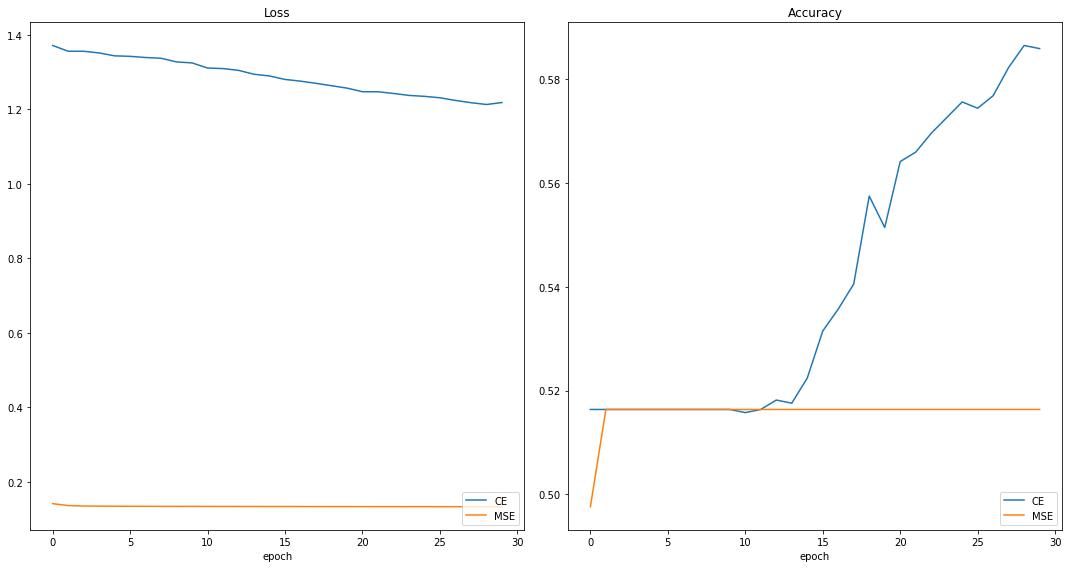

In [17]:
import matplotlib.pyplot as plt
plt.figure(0,figsize=(15,8))
plt.subplot(121)
plt.plot(range(len(loss_ce)), loss_ce,label='CE')
plt.plot(range(len(loss_mse)), loss_mse,label='MSE')

plt.title('Loss')
plt.xlabel("epoch")
plt.legend(loc='lower right')
plt.subplot(122)
plt.plot(range(len(acc_ce)), acc_ce,label='CE')
plt.plot(range(len(acc_mse)), acc_mse,label='MSE')

plt.title('Accuracy')
plt.xlabel("epoch")
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

# Learning rate (fit loss function)
Learning rate is a hyper-parameter that controls how much we are adjusting the weights of our network with respect the loss gradient. <br>
It affects how quickly our model can **converge** to a local minima. <br>
The **lower** the value, the **slower** we travel along the downward slope.  <br>

![](https://i.imgur.com/mRoyMJY.png)
![](https://i.imgur.com/35WCF5n.png)

In [18]:
sgd1 = SGD(lr=0.1,momentum=0.0,decay=0.0,nesterov=False)

In [19]:
sgd2 = SGD(lr=0.01,momentum=0.0,decay=0.0,nesterov=False)

In [20]:
sgd3 = SGD(lr=0.001,momentum=0.0,decay=0.0,nesterov=False)

## Compile
<br>show the result with different learning rate.

* **lr ＝ 0.1**

In [21]:
model_ce.compile(loss='categorical_crossentropy',
				optimizer=sgd1,
				metrics=['accuracy'])

In [22]:
history_ce1= model_ce.fit(X_train, Y_train,
							batch_size=batch_size,
							epochs=epochs,
							verbose=0,
							shuffle=True,
                    		validation_split=0.1)

In [23]:
loss_small = history_ce1.history.get('loss')
acc_small = history_ce1.history.get('acc')

 * **lr ＝ 0.01**

In [24]:
model_ce.compile(loss='categorical_crossentropy',
				optimizer=sgd2,
				metrics=['accuracy'])

In [25]:
history_ce2 = model_ce.fit(X_train, Y_train,
							batch_size=batch_size,
							epochs=epochs,
							verbose=0,
							shuffle=True,
                    		validation_split=0.1)

In [26]:
loss_median = history_ce2.history.get('loss')
acc_median = history_ce2.history.get('acc')

 * **lr ＝ 0.001**

In [27]:
model_ce.compile(loss= 'categorical_crossentropy',
              optimizer=sgd3,
              metrics=['accuracy'])

In [28]:
history_ce3 = model_ce.fit(X_train, Y_train,
							batch_size=batch_size,
							epochs=epochs,
							verbose=0,
							shuffle=True,
                    		validation_split=0.1)

In [29]:
loss_large = history_ce3.history.get('loss')
acc_large = history_ce3.history.get('acc')

## Visualization

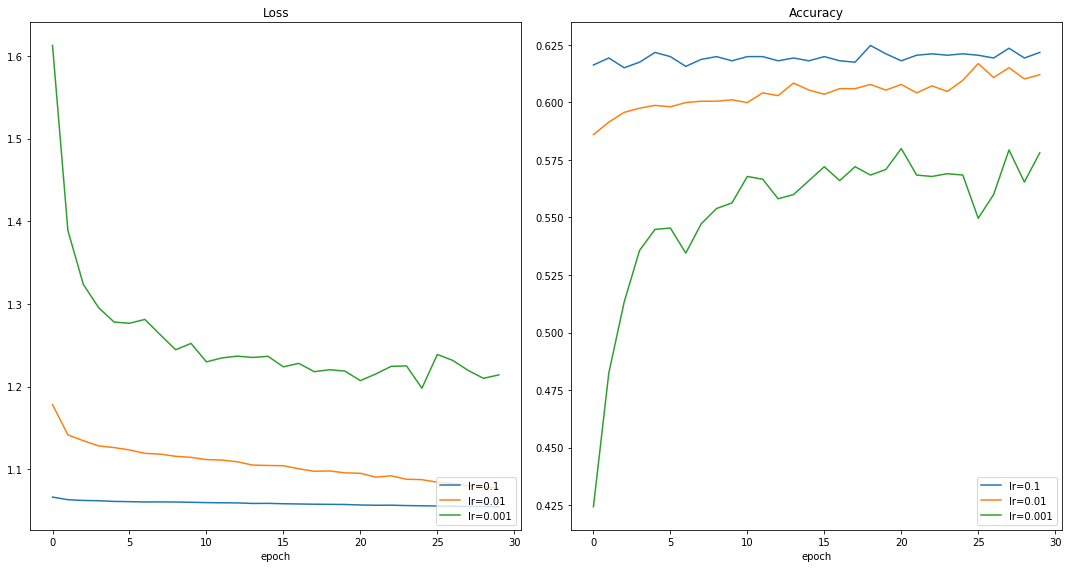

In [30]:
import matplotlib.pyplot as plt
plt.figure(0,figsize=(15,8))
plt.subplot(121)
plt.plot(range(len(loss_large)), loss_large,label='lr=0.1')
plt.plot(range(len(loss_median)), loss_median,label='lr=0.01')
plt.plot(range(len(loss_small)), loss_small,label='lr=0.001')

plt.title('Loss')
plt.xlabel("epoch")
plt.legend(loc='lower right')
plt.subplot(122)
plt.plot(range(len(acc_large)), acc_large,label='lr=0.1')
plt.plot(range(len(acc_median)), acc_median,label='lr=0.01')
plt.plot(range(len(acc_small)), acc_small,label='lr=0.001')

plt.title('Accuracy')
plt.xlabel("epoch")
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

## About Activation function (fit loss function, learning rate)

## RELU
<br>In backpropagation, RELU is often used because it can mitigate **vanishing gradient problem** and calculate quickly. <br>
![](https://i.imgur.com/Mskv1XJ.png)

---
## dying RELU problem
<br>
The downside for being zero for all negative values is a problem called “dying ReLU.”<br>
A ReLU neuron is “dead” if it’s stuck in the negative side and always outputs 0.
<br>Because the slope of ReLU in the negative range is also 0, once a neuron gets negative, it’s unlikely for it to recover. 
![](https://i.imgur.com/MieyPyy.png)

In [31]:
model_sp = Sequential()
model_sp.add(Dense(128, input_dim=200))
model_sp.add(Activation('relu'))
model_sp.add(Dense(256))
model_sp.add(Activation('relu'))
model_sp.add(Dense(5))
model_sp.add(Activation('softmax'))

In [32]:
model_sp.compile(loss= 'categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

history_sp = model_sp.fit(X_train, Y_train,
							batch_size=batch_size,
							epochs=epochs,
							verbose=0,
							shuffle=True,
                    		validation_split=0.1)

loss_sp = history_sp.history.get('loss')
acc_sp = history_sp.history.get('acc')

## Sigmoid
<br>Not recommended because convergence is too slow and it is easy to occur **vanishing gradient problem**. <br>
![](https://i.imgur.com/cDNoCkE.png)


In [33]:
model_bm = Sequential()
model_bm.add(Dense(128, input_dim=200))
model_bm.add(Activation('sigmoid'))
model_bm.add(Dense(256))
model_bm.add(Activation('sigmoid'))
model_bm.add(Dense(5))
model_bm.add(Activation('softmax'))

In [34]:
model_bm.compile(loss='categorical_crossentropy',
				optimizer=sgd,
				metrics=['accuracy'])
history_bm = model_bm.fit(X_train, Y_train,
							batch_size=batch_size,
							epochs=epochs,
							verbose=0,
							shuffle=True,
                    		validation_split=0.1)
loss_bm	= history_bm.history.get('loss')
acc_bm 	= history_bm.history.get('acc')

## tanh
<br><br>
![](https://i.imgur.com/f3h71wj.png)

In [35]:
model_tn = Sequential()
model_tn.add(Dense(128, input_dim=200))
model_tn.add(Activation('tanh'))
model_tn.add(Dense(256))
model_tn.add(Activation('tanh'))
model_tn.add(Dense(5))
model_tn.add(Activation('softmax'))

In [36]:
model_tn.compile(loss='categorical_crossentropy',
				optimizer=sgd,
				metrics=['accuracy'])
history_tn = model_tn.fit(X_train, Y_train,
							batch_size=batch_size,
							epochs=epochs,
							verbose=0,
							shuffle=True,
                    		validation_split=0.1)
loss_tn	= history_tn.history.get('loss')
acc_tn 	= history_tn.history.get('acc')

## RELU + Sigmoid

In [37]:
model_mix = Sequential()
model_mix.add(Dense(128, input_dim=200))
model_mix.add(Activation('relu'))
model_mix.add(Dense(256))
model_mix.add(Activation('sigmoid'))
model_mix.add(Dense(5))
model_mix.add(Activation('softmax'))

In [38]:
model_mix.compile(loss='categorical_crossentropy',
				optimizer=sgd,
				metrics=['accuracy'])
history_mix = model_mix.fit(X_train, Y_train,
							batch_size=batch_size,
							epochs=epochs,
							verbose=0,
							shuffle=True,
                    		validation_split=0.1)
loss_mix	= history_mix.history.get('loss')
acc_mix 	= history_mix.history.get('acc')

## Sigmoid + RELU

In [39]:
model_mix2 = Sequential()
model_mix2.add(Dense(128, input_dim=200))
model_mix2.add(Activation('sigmoid'))
model_mix2.add(Dense(256))
model_mix2.add(Activation('relu'))
model_mix2.add(Dense(5))
model_mix2.add(Activation('softmax'))

In [40]:
model_mix2.compile(loss='categorical_crossentropy',
				optimizer=sgd,
				metrics=['accuracy'])
history_mix2 = model_mix2.fit(X_train, Y_train,
							batch_size=batch_size,
							epochs=epochs,
							verbose=0,
							shuffle=True,
                    		validation_split=0.1)
loss_mix2	= history_mix2.history.get('loss')
acc_mix2 	= history_mix2.history.get('acc')

## relu + tanh

In [41]:
model_mix3 = Sequential()
model_mix3.add(Dense(128, input_dim=200))
model_mix3.add(Activation('relu'))
model_mix3.add(Dense(256))
model_mix3.add(Activation('tanh'))
model_mix3.add(Dense(5))
model_mix3.add(Activation('softmax'))

In [42]:
model_mix3.compile(loss='categorical_crossentropy',
				optimizer=sgd,
				metrics=['accuracy'])
history_mix3 = model_mix3.fit(X_train, Y_train,
							batch_size=batch_size,
							epochs=epochs,
							verbose=0,
							shuffle=True,
                    		validation_split=0.1)
loss_mix3	= history_mix3.history.get('loss')
acc_mix3 	= history_mix3.history.get('acc')

## tanh + relu

In [43]:
model_mix4 = Sequential()
model_mix4.add(Dense(128, input_dim=200))
model_mix4.add(Activation('tanh'))
model_mix4.add(Dense(256))
model_mix4.add(Activation('relu'))
model_mix4.add(Dense(5))
model_mix4.add(Activation('softmax'))

In [44]:
model_mix4.compile(loss='categorical_crossentropy',
				optimizer=sgd,
				metrics=['accuracy'])
history_mix4 = model_mix4.fit(X_train, Y_train,
							batch_size=batch_size,
							epochs=epochs,
							verbose=0,
							shuffle=True,
                    		validation_split=0.1)
loss_mix4	= history_mix4.history.get('loss')
acc_mix4 	= history_mix4.history.get('acc')

## Visualization

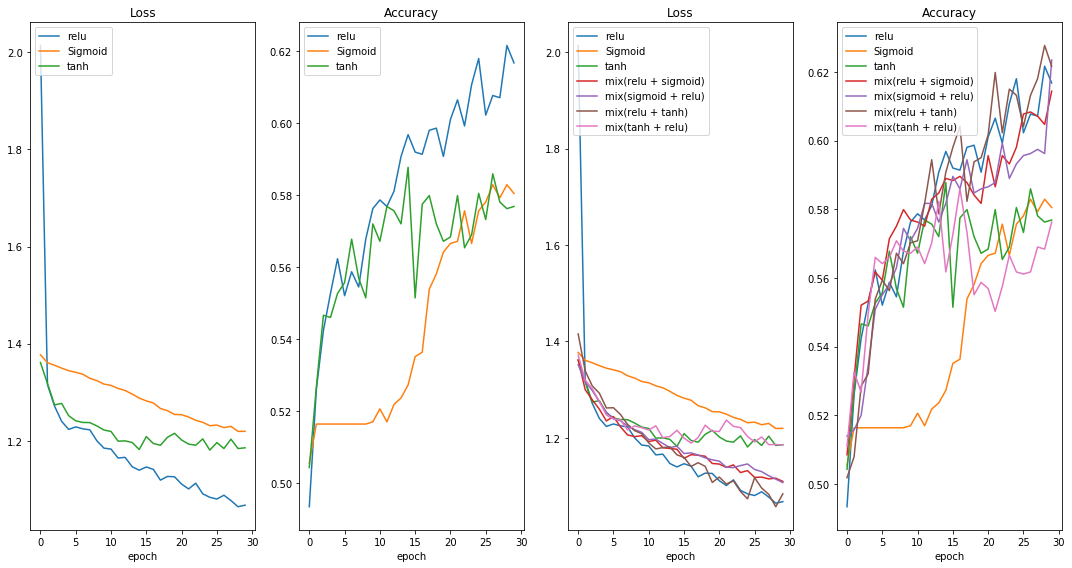

In [45]:
import matplotlib.pyplot as plt
plt.figure(0,figsize=(15,8))

plt.subplot(141)
plt.plot(range(len(loss_sp)),loss_sp,label='relu')
plt.plot(range(len(loss_bm)),loss_bm,label='Sigmoid')
plt.plot(range(len(loss_tn)),loss_tn,label='tanh')
plt.title('Loss')
plt.xlabel("epoch")
plt.legend(loc='upper left')

plt.subplot(142)
plt.plot(range(len(acc_sp)),acc_sp,label='relu')
plt.plot(range(len(acc_bm)),acc_bm,label='Sigmoid')
plt.plot(range(len(acc_tn)),acc_tn,label='tanh')
plt.title('Accuracy')
plt.xlabel("epoch")
plt.legend(loc='upper left')

plt.subplot(143)
plt.plot(range(len(loss_sp)),loss_sp,label='relu')
plt.plot(range(len(loss_bm)),loss_bm,label='Sigmoid')
plt.plot(range(len(loss_tn)),loss_tn,label='tanh')
plt.plot(range(len(loss_mix)),loss_mix,label='mix(relu + sigmoid)')
plt.plot(range(len(loss_mix2)),loss_mix2,label='mix(sigmoid + relu)')
plt.plot(range(len(loss_mix3)),loss_mix3,label='mix(relu + tanh)')
plt.plot(range(len(loss_mix4)),loss_mix4,label='mix(tanh + relu)')

plt.title('Loss')
plt.xlabel("epoch")
plt.legend(loc='upper left')
plt.subplot(144)
plt.plot(range(len(acc_sp)),acc_sp,label='relu')
plt.plot(range(len(acc_bm)),acc_bm,label='Sigmoid')
plt.plot(range(len(acc_tn)),acc_tn,label='tanh')
plt.plot(range(len(acc_mix)),acc_mix,label='mix(relu + sigmoid)')
plt.plot(range(len(acc_mix2)),acc_mix2,label='mix(sigmoid + relu)')
plt.plot(range(len(acc_mix3)),acc_mix3,label='mix(relu + tanh)')
plt.plot(range(len(acc_mix4)),acc_mix4,label='mix(tanh + relu)')


plt.title('Accuracy')
plt.xlabel("epoch")
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

### vanishing gradient problem
<br>
Vanishing gradient problem depends on the choice of the **activation function**. <br>
Many common activation functions (e.g **sigmoid** or **tanh**) **squash** their input into a very small output range in a very non-linear fashion. <br>
For example, sigmoid maps the real number line onto a **small** range of [0, 1]. <br>
As a result, there are large regions of the input space which are mapped to an extremely small range. <br>
In these regions of the input space, even a large change in the input will produce a small change in the output - hence the gradient is small. 
![](https://i.imgur.com/cH1mLyM.png)

## About optimizer
Optimization algorithms helps us to **minimize** a **Loss** function. <br>
Here, we will present four different optimizers.<br>
### How to Select Optimizers
* People usually use **Adam**
    * Adaptive learning rate for every weights 
    * Momentum included
* Recommend **RMSprop** in RNN
    * **explosive gradient** may happen when training 
    * Solution : Clip gradient 
    
### Parameters common to all Keras optimizers
* clipnorm
    * EX. sgd = optimizers.SGD(lr=0.01, **clipnorm=1.**)
    * All parameter gradients will be clipped to a maximum norm of 1.
* clipvalue
    * EX. sgd = optimizers.SGD(lr=0.01, **clipvalue=0.5**)
    * All parameter gradients will be clipped to a maximum value of 0.5 and a minimum value of -0.5.

In [46]:
from keras.optimizers import SGD, Adam, RMSprop, Adagrad

In [47]:
model_sp = Sequential()
model_sp.add(Dense(128, input_dim=200))
model_sp.add(Activation('relu'))
model_sp.add(Dense(256))
model_sp.add(Activation('relu'))
model_sp.add(Dense(5))
model_sp.add(Activation('softmax'))

## SGD
Stochastic Gradient Descent
* **lr** : float >= 0. Learning rate.
* **momentum** : float >= 0. Accelerates SGD in the relevant direction.
* **decay**: float >= 0. Learning rate decay over each update.
* **nesterov*
*: boolean. Whether to apply Nesterov momentum.

---
![](https://i.imgur.com/vpCTJih.png)

In [48]:
model_sp.compile(loss= 'categorical_crossentropy',
              		optimizer=SGD(lr=0.01),
              		metrics=['accuracy'])
history_sgd = model_sp.fit(X_train, Y_train,
							batch_size=batch_size,
							epochs=epochs,
							verbose=0,
							shuffle=True,
                    		validation_split=0.1)

loss_sgd = history_sgd.history.get('loss')
acc_sgd = history_sgd.history.get('acc')

## Adagrad
Adaptive Learning Rate <br>
Modified by the **root mean square** of all **previous gradients**.

---
![](https://i.imgur.com/Vp0HPn0.png)
![](https://i.imgur.com/BoYUtM7.png)

In [49]:
model_sp.compile(loss= 'categorical_crossentropy',
              		optimizer=Adagrad(lr=0.01),
              		metrics=['accuracy'])
history_ada = model_sp.fit(X_train, Y_train,
							batch_size=batch_size,
							epochs=epochs,
							verbose=0,
							shuffle=True,
                    		validation_split=0.1)

loss_ada = history_ada.history.get('loss')
acc_ada = history_ada.history.get('acc')

## RMSprop
Similar with Adagrad, also modified by previous gradients. 
RMSprop is a good choice for RNN.

---
![](https://i.imgur.com/0Lf7JUd.png)

In [50]:
model_sp.compile(loss= 'categorical_crossentropy',
              		optimizer=RMSprop(lr=0.01),
              		metrics=['accuracy'])
history_rms = model_sp.fit(X_train, Y_train,
							batch_size=batch_size,
							epochs=epochs,
							verbose=0,
							shuffle=True,
                    		validation_split=0.1)

loss_rms = history_rms.history.get('loss')
acc_rms = history_rms.history.get('acc')

## Adam
Similar with RMSprop + Momentum

In [51]:
model_sp.compile(loss= 'categorical_crossentropy',
              		optimizer=Adam(lr=0.01),
              		metrics=['accuracy'])
history_adam = model_sp.fit(X_train, Y_train,
							batch_size=batch_size,
							epochs=epochs,
							verbose=1,
							shuffle=True,
                    		validation_split=0.1)

loss_adam= history_adam.history.get('loss')
acc_adam = history_adam.history.get('acc')

Train on 1652 samples, validate on 184 samples
Epoch 1/30
1652/1652 [==============================] - 1s 335us/step - loss: 7.7956 - acc: 0.5163 - val_loss: 7.7963 - val_acc: 0.5163
Epoch 2/30
1652/1652 [==============================] - 0s 147us/step - loss: 7.7956 - acc: 0.5163 - val_loss: 7.7963 - val_acc: 0.5163
Epoch 3/30
1652/1652 [==============================] - 0s 147us/step - loss: 7.7956 - acc: 0.5163 - val_loss: 7.7963 - val_acc: 0.5163
Epoch 4/30
1652/1652 [==============================] - 0s 150us/step - loss: 7.7956 - acc: 0.5163 - val_loss: 7.7963 - val_acc: 0.5163
Epoch 5/30
1652/1652 [==============================] - 0s 161us/step - loss: 7.7956 - acc: 0.5163 - val_loss: 7.7963 - val_acc: 0.5163
Epoch 6/30
1652/1652 [==============================] - 0s 149us/step - loss: 7.7956 - acc: 0.5163 - val_loss: 7.7963 - val_acc: 0.5163
Epoch 7/30
1652/1652 [==============================] - 0s 152us/step - loss: 7.7956 - acc: 0.5163 - val_loss: 7.7963 - val_acc: 0.5163
E

## Visualization
---
**Adagrad, Adadelta** and **RMSprop** find the correct direction in a short time. <br>
![](https://static.leiphone.com/uploads/new/article/740_740/201706/5943a067842cf.gif)

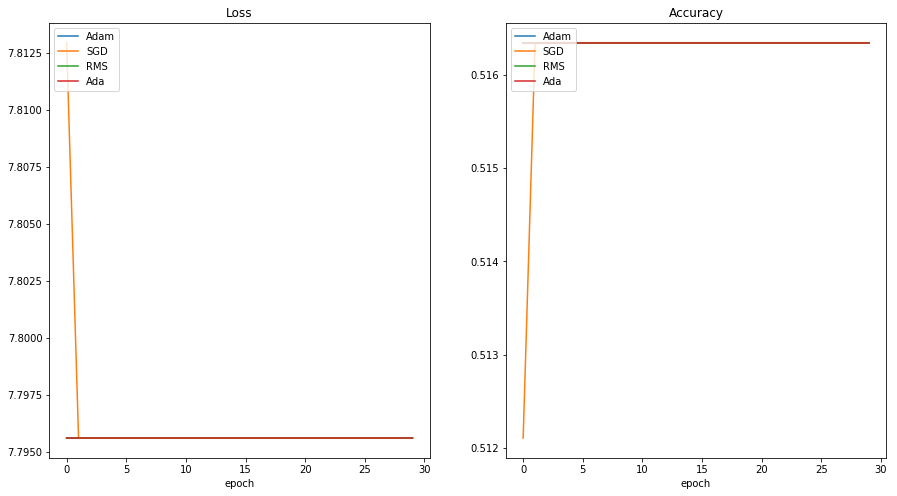

In [52]:
import matplotlib.pyplot as plt
plt.figure(0,figsize=(15,8))
plt.subplot(121)
plt.plot(range(len(loss_adam)), loss_adam,label='Adam')
plt.plot(range(len(loss_sgd)), loss_sgd,label='SGD')
plt.plot(range(len(loss_rms)), loss_rms,label='RMS')
plt.plot(range(len(loss_ada)), loss_ada,label='Ada')


plt.title('Loss')
plt.xlabel("epoch")
plt.legend(loc='upper left')
plt.subplot(122)
plt.plot(range(len(acc_adam)), acc_adam,label='Adam')
plt.plot(range(len(acc_sgd)), acc_sgd,label='SGD')
plt.plot(range(len(acc_rms)), acc_rms,label='RMS')
plt.plot(range(len(acc_ada)), acc_ada,label='Ada')

plt.legend(loc='upper left')
plt.title('Accuracy')
plt.xlabel("epoch")
plt.show()

## About overfitting
In statistics, goodness of fit refers to how closely a model’s predicted values match the observed (true) values.

A model that has learned the noise instead of the signal is considered “overfit” because it fits the training dataset but has poor fit with new datasets.<br><br><br>
![](https://i.imgur.com/0vxKm1f.png)
* While the black line fits the data well, the green line is overfit.

### How to Detect Overfitting
A key challenge with overfitting, and with machine learning in general, is that we can’t know how well our model will perform on new data until we actually test it.

To address this, we can split our initial dataset into separate training and test subsets.<br><br><br>
![](https://i.imgur.com/bnNPSlN.png)<br><br><br>
* This method can approximate of how well our model will perform on new data.
* If our model does much better on the training set than on the test set, then we’re likely overfitting.
* For example, it would be a big red flag if our model saw 99% accuracy on the training set but only 55% accuracy on the test set.



In [53]:
model_adam = Sequential()
model_adam.add(Dense(128, input_dim=200))
model_adam.add(Activation('relu'))
model_adam.add(Dense(256))
model_adam.add(Activation('relu'))
model_adam.add(Dense(5))
model_adam.add(Activation('softmax'))
model_adam.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 128)               25728     
_________________________________________________________________
activation_31 (Activation)   (None, 128)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 256)               33024     
_________________________________________________________________
activation_32 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_33 (Dense)             (None, 5)                 1285      
_________________________________________________________________
activation_33 (Activation)   (None, 5)                 0         
Total params: 60,037
Trainable params: 60,037
Non-trainable params: 0
_________________________________________________________________


In [54]:
model_adam.compile(loss= 'categorical_crossentropy',
              		optimizer='Adam',
              		metrics=['accuracy'])

In [55]:
history_adam = model_adam.fit(X_train, Y_train,
							batch_size=batch_size,
							epochs=epochs,
							verbose=0,
							shuffle=True,
                    		validation_split=0.1)


In [56]:
loss_adam= history_adam.history.get('loss')
acc_adam = history_adam.history.get('acc')

In [57]:
val_loss_adam = history_adam.history.get('val_loss')
val_acc_adam = history_adam.history.get('val_acc')

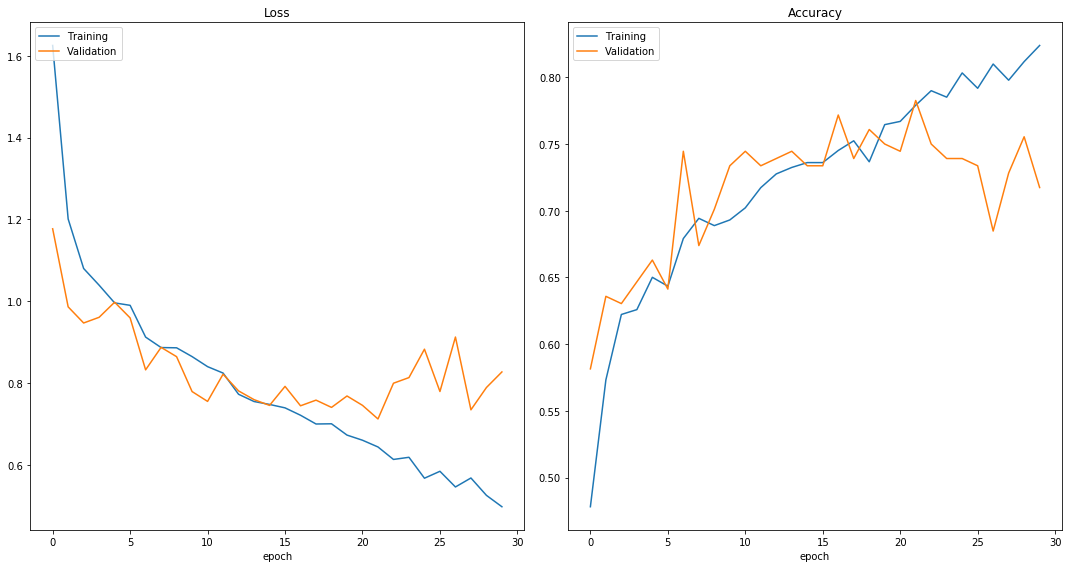

In [58]:
plt.figure(0,figsize=(15,8))
plt.subplot(121)
plt.plot(range(len(loss_adam)), loss_adam,label='Training')
plt.plot(range(len(val_loss_adam)), val_loss_adam,label='Validation')
plt.title('Loss')
plt.xlabel("epoch")
plt.legend(loc='upper left')


plt.subplot(122)
plt.plot(range(len(acc_adam)), acc_adam,label='Training')
plt.plot(range(len(val_acc_adam)), val_acc_adam,label='Validation')
plt.title('Accuracy')
plt.xlabel("epoch")
plt.legend(loc='upper left')


plt.tight_layout()
plt.show()

## How to Prevent Overfitting ??<br>
1. **Cross-validation**<br><br>
     The idea is clever: Use your initial training data to generate multiple mini train-test splits. Use these splits to tune your model.<br>
    In standard k-fold cross-validation, we partition the data into k subsets, called folds. Then, we iteratively train the algorithm on k-1 folds while using the remaining fold as the test set (called the “holdout fold”).
    ![](https://i.imgur.com/t8rJD43.png)
2. **Train with more data**<br><br>
    It won’t work everytime, but training with more data can help algorithms detect the signal better.<br>
    We can build a distribution of my dataset, or using a normal distribution to produce data.
    ![](https://i.imgur.com/WNHd1R0.png)
<br><br><br>
3. **Remove features**<br><br>
    Some algorithms have built-in feature selection.<br>
    For those that don’t, you can manually improve their generalizability by removing irrelevant input features.<br><br><br>

4. **Early stopping**<br><br>
    When you’re training a learning algorithm iteratively, you can measure how well each iteration of the model performs.<br>
    Up until a certain number of iterations, new iterations improve the model. After that point, however, the model’s ability to generalize can weaken as it begins to overfit the training data.
    <br>Early stopping refers stopping the training process before the learner passes that point.
    <br><br><br>
5. **Regularization**<br><br>
    Regularization refers to a broad range of techniques for artificially forcing your model to be simpler.<br>
    The method will depend on the type of learner you’re using. For example, you could prune a decision tree, use dropout on a neural network, or add a penalty parameter to the cost function in regression.<br>
    Oftentimes, the regularization method is a hyperparameter as well, which means it can be tuned through cross-validation.<br>
    ![](https://i.imgur.com/O3mjqdj.png)
    <br>
    ![](https://i.imgur.com/P4keQ5W.png)
<br><br><br>
6. **Ensembling**<br><br>
    Ensembles are machine learning methods for combining predictions from multiple separate models. There are a few different methods for ensembling, but the two most common are:<br>
    * Bagging attempts to reduce the chance overfitting complex models.<br>
        > * It trains a large number of "strong" learners in parallel.<br>
        > * A strong learner is a model that's relatively unconstrained.<br>
        > * Bagging then combines all the strong learners together in order to "smooth out" their predictions.<br>

    * Boosting attempts to improve the predictive flexibility of simple models.<br>
        > * It trains a large number of "weak" learners in sequence.<br>
        > * A weak learner is a constrained model (i.e. you could limit the max depth of each decision tree).<br>
        > * Each one in the sequence focuses on learning from the mistakes of the one before it.<br>
        > * Boosting then combines all the weak learners into a single strong learner.<br>
        
<br><br><br>
reference : https://elitedatascience.com/overfitting-in-machine-learning

In [59]:
from keras.regularizers import l1,l2

## L1 Regularization

In [60]:
model_l1 = Sequential()
model_l1.add(Dense(128, input_dim=200, kernel_regularizer=l2(0.005)))
model_l1.add(Activation('relu'))
model_l1.add(Dense(256, kernel_regularizer=l2(0.005)))
model_l1.add(Activation('relu'))
model_l1.add(Dense(5))
model_l1.add(Activation('softmax'))
model_l1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_34 (Dense)             (None, 128)               25728     
_________________________________________________________________
activation_34 (Activation)   (None, 128)               0         
_________________________________________________________________
dense_35 (Dense)             (None, 256)               33024     
_________________________________________________________________
activation_35 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_36 (Dense)             (None, 5)                 1285      
_________________________________________________________________
activation_36 (Activation)   (None, 5)                 0         
Total params: 60,037
Trainable params: 60,037
Non-trainable params: 0
_________________________________________________________________


## L2 Regularization

In [61]:
model_l2 = Sequential()
model_l2.add(Dense(128, input_dim=200, kernel_regularizer=l2(0.005)))
model_l2.add(Activation('relu'))
model_l2.add(Dense(256, kernel_regularizer=l2(0.005)))
model_l2.add(Activation('relu'))
model_l2.add(Dense(5))
model_l2.add(Activation('softmax'))

In [62]:
model_l1.compile(loss= 'categorical_crossentropy',
              	optimizer='Adam',
              	metrics=['accuracy'])

In [63]:
model_l2.compile(loss= 'categorical_crossentropy',
              	optimizer='Adam',
              	metrics=['accuracy'])

In [64]:
history_l1 = model_l1.fit(X_train, Y_train,
							batch_size=batch_size,
							epochs=epochs,
							verbose=0,
							shuffle=True,
                    		validation_split=0.1)

In [65]:
loss_l1 = history_l1.history.get('loss')
acc_l1 = history_l1.history.get('acc')
val_loss_l1 = history_l1.history.get('val_loss')
val_acc_l1 = history_l1.history.get('val_acc')

In [66]:
history_l2 = model_l2.fit(X_train, Y_train,
							batch_size=batch_size,
							epochs=epochs,
							verbose=0,
							shuffle=True,
                    		validation_split=0.1)

In [67]:
loss_l2 = history_l2.history.get('loss')
acc_l2 = history_l2.history.get('acc')
val_loss_l2 = history_l2.history.get('val_loss')
val_acc_l2 = history_l2.history.get('val_acc')

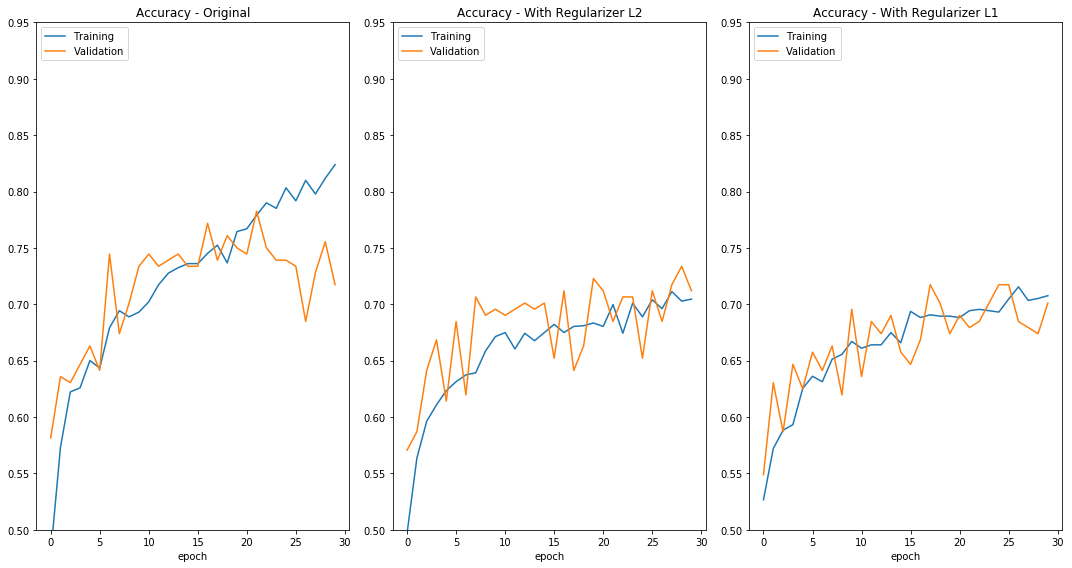

In [68]:
import matplotlib.pyplot as plt
plt.figure(0,figsize=(15,8))
plt.subplot(131)
plt.plot(range(len(acc_adam)), acc_adam,label='Training')
plt.plot(range(len(val_acc_adam)), val_acc_adam,label='Validation')
plt.ylim([0.5,0.95])
plt.title('Accuracy - Original')
plt.xlabel("epoch")
plt.legend(loc='upper left')

plt.subplot(132)
plt.plot(range(len(acc_l2)), acc_l2,label='Training')
plt.plot(range(len(val_acc_l2)), val_acc_l2,label='Validation')
plt.ylim([0.5,0.95])
plt.title('Accuracy - With Regularizer L2')
plt.xlabel("epoch")
plt.legend(loc='upper left')

plt.subplot(133)
plt.plot(range(len(acc_l1)), acc_l1,label='Training')
plt.plot(range(len(val_acc_l1)), val_acc_l1,label='Validation')
plt.ylim([0.5,0.95])
plt.title('Accuracy - With Regularizer L1')
plt.xlabel("epoch")
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

## Early Stopping
<br><br>
![](https://i.imgur.com/XQsGEZq.png)
<br>

In [69]:
''' EarlyStopping '''
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor = 'val_loss', min_delta=0.0001, patience = 3)

In [70]:
model_adam = Sequential()
model_adam.add(Dense(128, input_dim=200))
model_adam.add(Activation('relu'))
model_adam.add(Dense(256))
model_adam.add(Activation('relu'))
model_adam.add(Dense(5))
model_adam.add(Activation('softmax'))

In [71]:
model_adam.compile(loss= 'categorical_crossentropy',
              		optimizer='Adam',
              		metrics=['accuracy'])

In [72]:
history_adam = model_adam.fit(X_train, Y_train,
							batch_size=batch_size,
							epochs=epochs,
							verbose=1,
							shuffle=True,
                    		validation_split=0.1,
                    		callbacks=[early_stopping])

Train on 1652 samples, validate on 184 samples
Epoch 1/30
1652/1652 [==============================] - 1s 405us/step - loss: 1.5728 - acc: 0.4849 - val_loss: 1.5441 - val_acc: 0.3696
Epoch 2/30
1652/1652 [==============================] - 0s 155us/step - loss: 1.2120 - acc: 0.5636 - val_loss: 1.1657 - val_acc: 0.5978
Epoch 3/30
1652/1652 [==============================] - 0s 139us/step - loss: 1.1121 - acc: 0.5956 - val_loss: 1.0277 - val_acc: 0.6087
Epoch 4/30
1652/1652 [==============================] - 0s 152us/step - loss: 1.0362 - acc: 0.6308 - val_loss: 1.1747 - val_acc: 0.5598
Epoch 5/30
1652/1652 [==============================] - 0s 174us/step - loss: 1.0217 - acc: 0.6283 - val_loss: 0.8884 - val_acc: 0.6739
Epoch 6/30
1652/1652 [==============================] - 0s 166us/step - loss: 0.9857 - acc: 0.6707 - val_loss: 0.8652 - val_acc: 0.6576
Epoch 7/30
1652/1652 [==============================] - 0s 152us/step - loss: 0.8904 - acc: 0.6822 - val_loss: 0.8212 - val_acc: 0.6902
E

In [73]:
loss_adam = history_adam.history.get('loss')
acc_adam = history_adam.history.get('acc')
val_loss_adam = history_adam.history.get('val_loss')
val_acc_adam = history_adam.history.get('val_acc')

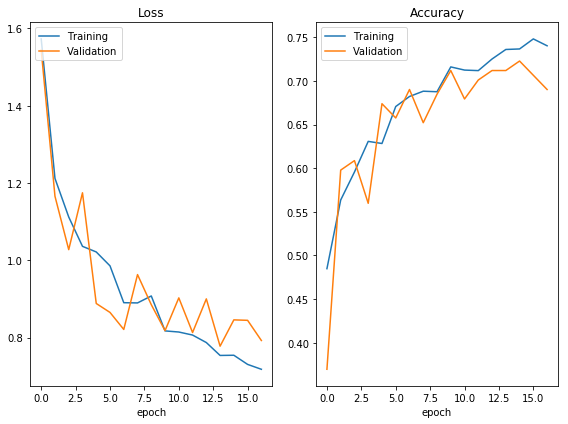

In [74]:
import matplotlib.pyplot as plt
plt.figure(0,figsize=(8,6))
plt.subplot(121)
plt.plot(range(len(loss_adam)), loss_adam,label='Training')
plt.plot(range(len(val_loss_adam)), val_loss_adam,label='Validation')
plt.title('Loss')
plt.xlabel("epoch")
plt.legend(loc='upper left')

plt.subplot(122)
plt.plot(range(len(acc_adam)), acc_adam,label='Training')
plt.plot(range(len(val_acc_adam)), val_acc_adam,label='Validation')
plt.title('Accuracy')
plt.xlabel("epoch")

plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

## Dropout
<br>
The term “dropout” refers to dropping out units (both hidden and visible) in a neural network.<br>
Simply put, dropout refers to ignoring units (i.e. neurons) during the training phase of certain set of neurons which is chosen at random. By “ignoring”, I mean these units are not considered during a particular forward or backward pass.<br>
<br><br>
![](https://i.imgur.com/I6Z7E5E.png)

## Why do we need Dropout?
<br>Given that we know a bit about dropout, a question arises — why do we need dropout at all? Why do we need to literally shut-down parts of a neural networks?
<br><br>
The answer to these questions is **“to prevent over-fitting”**.
<br><br>
A fully connected layer occupies most of the parameters, and hence, neurons develop co-dependency amongst each other during training which curbs the individual power of each neuron leading to over-fitting of training data.
<br><br>

![](https://i.imgur.com/rTDW3I8.png)

reference : https://medium.com/@amarbudhiraja/https-medium-com-amarbudhiraja-learning-less-to-learn-better-dropout-in-deep-machine-learning-74334da4bfc5

In [75]:
from keras.layers.core import Dropout

In [76]:
model_adam_d = Sequential()
model_adam_d.add(Dense(128, input_dim=200))
model_adam_d.add(Activation('relu'))
model_adam_d.add(Dropout(0.45))
model_adam_d.add(Dense(256))
model_adam_d.add(Activation('relu'))
model_adam_d.add(Dropout(0.4))
model_adam_d.add(Dense(5))
model_adam_d.add(Activation('softmax'))
model_adam_d.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_43 (Dense)             (None, 128)               25728     
_________________________________________________________________
activation_43 (Activation)   (None, 128)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_44 (Dense)             (None, 256)               33024     
_________________________________________________________________
activation_44 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_45 (Dense)             (None, 5)                 1285      
__________

In [77]:
model_adam_d.compile(loss= 'categorical_crossentropy',
              		optimizer='Adam',
              		metrics=['accuracy'])


In [78]:
history_adam_d = model_adam_d.fit(X_train, Y_train,
							batch_size=batch_size,
							epochs=epochs,
							verbose=0,
							shuffle=True,
                    		validation_split=0.1)
loss_adam_d = history_adam_d.history.get('loss')
acc_adam_d = history_adam_d.history.get('acc')
val_loss_adam_d = history_adam_d.history.get('val_loss')
val_acc_adam_d = history_adam_d.history.get('val_acc')

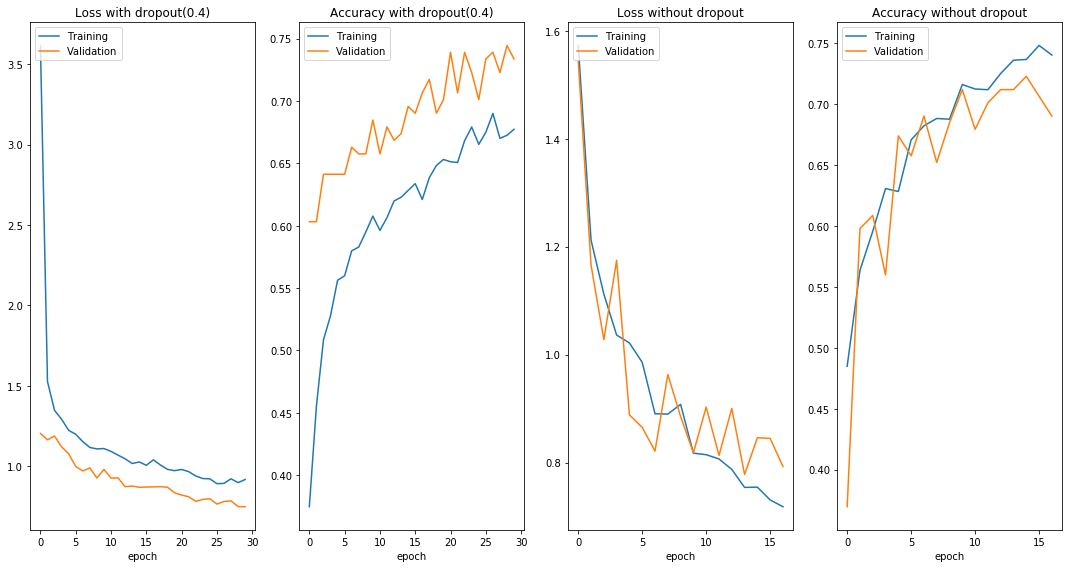

In [79]:
import matplotlib.pyplot as plt
plt.figure(0,figsize=(15,8))
plt.subplot(141)
plt.plot(range(len(loss_adam_d)), loss_adam_d,label='Training')
plt.plot(range(len(val_loss_adam_d)), val_loss_adam_d,label='Validation')
plt.title('Loss with dropout(0.4)')
plt.xlabel("epoch")
plt.legend(loc='upper left')

plt.subplot(142)
plt.plot(range(len(acc_adam_d)), acc_adam_d,label='Training')
plt.plot(range(len(val_acc_adam_d)), val_acc_adam_d,label='Validation')
plt.title('Accuracy with dropout(0.4)')
plt.xlabel("epoch")
plt.legend(loc='upper left')

plt.subplot(143)
plt.plot(range(len(loss_adam)), loss_adam,label='Training')
plt.plot(range(len(val_loss_adam)), val_loss_adam,label='Validation')
plt.title('Loss without dropout')
plt.xlabel("epoch")
plt.legend(loc='upper left')

plt.subplot(144)
plt.plot(range(len(acc_adam)), acc_adam,label='Training')
plt.plot(range(len(val_acc_adam)), val_acc_adam,label='Validation')
plt.title('Accuracy without dropout')
plt.xlabel("epoch")
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

## Batch normalization 
<br>Batch normalization often following activation function.
<br>Batch normalization sometimes followed activation function.
<br>it's such as approch to do miniBatch.
<br>
### why batch normalization?
1. one solution for **Internal Covariate Shift Problem**<br>
    ``` which can make it by minimizing learning rate, but this approch is too slow !```
<br><br>
2. ensure that fixed statistic bound for each layer.
<br><br>
3. Also, note that the hypothesis is that stabilizing intermediate activation distribution leads to faster convergence, but slows down the training procedure.

In [80]:
from keras.layers import BatchNormalization

In [81]:
model_adam_d = Sequential()
model_adam_d.add(Dense(128, input_dim=200))
model_adam_d.add(BatchNormalization())
model_adam_d.add(Activation('relu'))
model_adam_d.add(Dense(256))
model_adam_d.add(BatchNormalization())
model_adam_d.add(Activation('relu'))
model_adam_d.add(Dense(5))
model_adam_d.add(Activation('softmax'))
model_adam_d.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_46 (Dense)             (None, 128)               25728     
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
activation_46 (Activation)   (None, 128)               0         
_________________________________________________________________
dense_47 (Dense)             (None, 256)               33024     
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
activation_47 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_48 (Dense)             (None, 5)                 1285      
__________

---
Batch normalization followed by activation function. 

In [82]:
model_adam_d2 = Sequential()
model_adam_d2.add(Dense(128, input_dim=200))
model_adam_d2.add(Activation('relu'))
model_adam_d2.add(BatchNormalization())
model_adam_d2.add(Dense(256))
model_adam_d2.add(Activation('relu'))
model_adam_d2.add(BatchNormalization())
model_adam_d2.add(Dense(5))
model_adam_d2.add(Activation('softmax'))
model_adam_d2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_49 (Dense)             (None, 128)               25728     
_________________________________________________________________
activation_49 (Activation)   (None, 128)               0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 128)               512       
_________________________________________________________________
dense_50 (Dense)             (None, 256)               33024     
_________________________________________________________________
activation_50 (Activation)   (None, 256)               0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 256)               1024      
_________________________________________________________________
dense_51 (Dense)             (None, 5)                 1285      
__________

In [83]:
model_adam = Sequential()
model_adam.add(Dense(128, input_dim=200))
model_adam.add(Activation('relu'))
model_adam.add(Dense(256))
model_adam.add(Activation('relu'))
model_adam.add(Dense(5))
model_adam.add(Activation('softmax'))
model_adam.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_52 (Dense)             (None, 128)               25728     
_________________________________________________________________
activation_52 (Activation)   (None, 128)               0         
_________________________________________________________________
dense_53 (Dense)             (None, 256)               33024     
_________________________________________________________________
activation_53 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_54 (Dense)             (None, 5)                 1285      
_________________________________________________________________
activation_54 (Activation)   (None, 5)                 0         
Total params: 60,037
Trainable params: 60,037
Non-trainable params: 0
_________________________________________________________________


In [84]:
model_adam.compile(loss= 'categorical_crossentropy',
                    optimizer='Adam',
                    metrics=['accuracy'])

model_adam_d.compile(loss= 'categorical_crossentropy',
                    optimizer='Adam',
                    metrics=['accuracy'])

model_adam_d2.compile(loss= 'categorical_crossentropy',
                    optimizer='Adam',
                    metrics=['accuracy'])


In [85]:
history_adam = model_adam.fit(X_train, Y_train,
							batch_size=batch_size,
							epochs=epochs,
							verbose=0,
							shuffle=True,
                    		validation_split=0.1)
loss_adam = history_adam.history.get('loss')
acc_adam = history_adam.history.get('acc')
val_loss_adam = history_adam.history.get('val_loss')
val_acc_adam = history_adam.history.get('val_acc')


history_adam_d = model_adam_d.fit(X_train, Y_train,
							batch_size=batch_size,
							epochs=epochs,
							verbose=0,
							shuffle=True,
                    		validation_split=0.1)

history_adam_d2 = model_adam_d2.fit(X_train, Y_train,
							batch_size=batch_size,
							epochs=epochs,
							verbose=0,
							shuffle=True,
                    		validation_split=0.1)

loss_adam_d = history_adam_d.history.get('loss')
acc_adam_d = history_adam_d.history.get('acc')

val_loss_adam_d = history_adam_d.history.get('val_loss')
val_acc_adam_d = history_adam_d.history.get('val_acc')


loss_adam_d2 = history_adam_d.history.get('loss')
acc_adam_d2 = history_adam_d.history.get('acc')


val_loss_adam_d2 = history_adam_d2.history.get('val_loss')
val_acc_adam_d2 = history_adam_d2.history.get('val_acc')

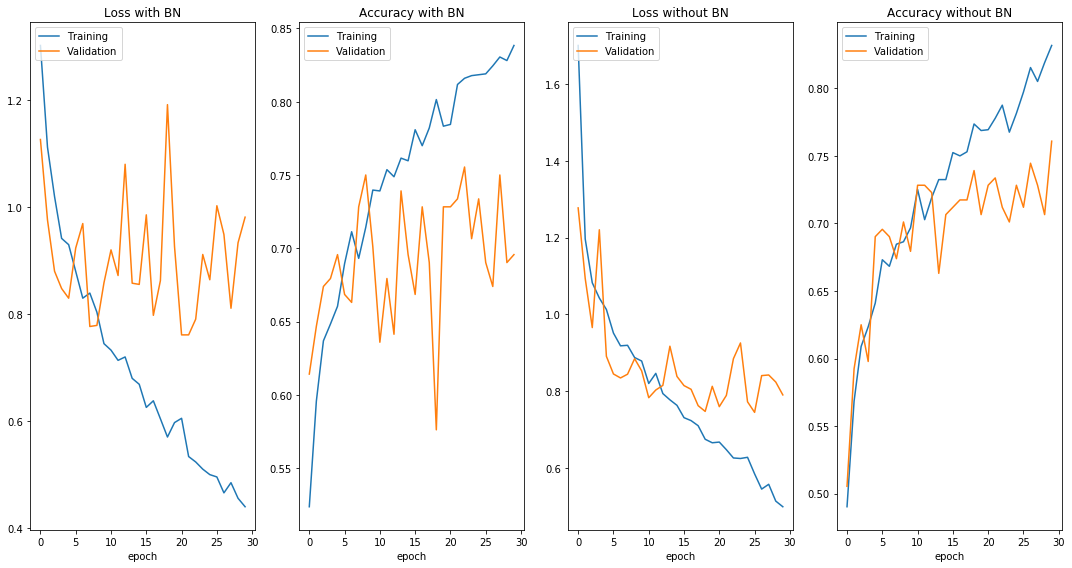

In [86]:
import matplotlib.pyplot as plt
plt.figure(0,figsize=(15,8))
plt.subplot(141)
plt.plot(range(len(loss_adam_d)), loss_adam_d,label='Training')
plt.plot(range(len(val_loss_adam_d)), val_loss_adam_d,label='Validation')
plt.title('Loss with BN')
plt.xlabel("epoch")
plt.legend(loc='upper left')

plt.subplot(142)
plt.plot(range(len(acc_adam_d)), acc_adam_d,label='Training')
plt.plot(range(len(val_acc_adam_d)), val_acc_adam_d,label='Validation')
plt.title('Accuracy with BN')
plt.xlabel("epoch")
plt.legend(loc='upper left')

plt.subplot(143)
plt.plot(range(len(loss_adam)), loss_adam,label='Training')
plt.plot(range(len(val_loss_adam)), val_loss_adam,label='Validation')
plt.title('Loss without BN')
plt.xlabel("epoch")
plt.legend(loc='upper left')

plt.subplot(144)
plt.plot(range(len(acc_adam)), acc_adam,label='Training')
plt.plot(range(len(val_acc_adam)), val_acc_adam,label='Validation')
plt.title('Accuracy without BN')
plt.xlabel("epoch")
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

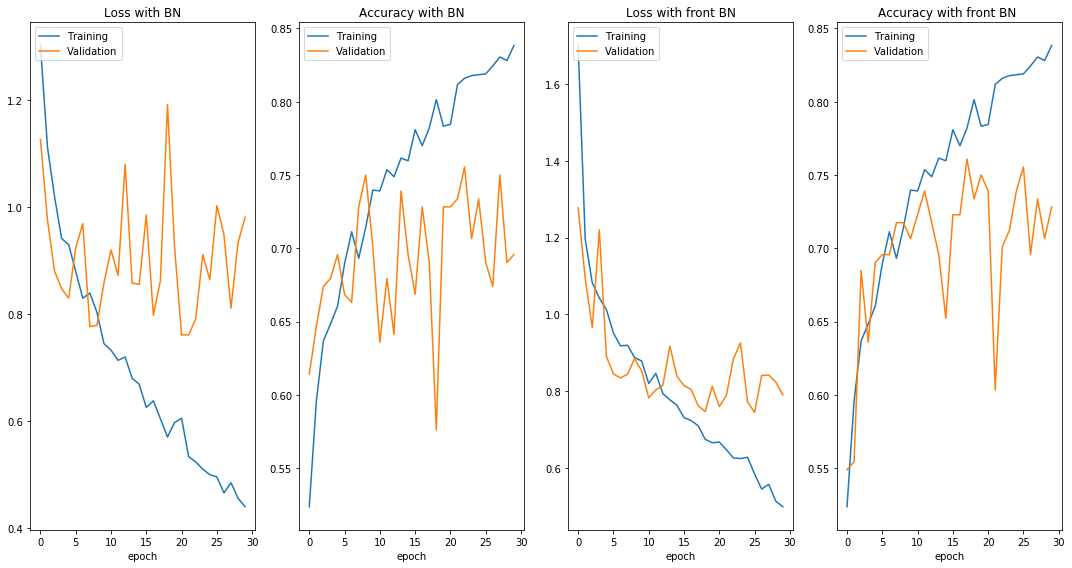

In [87]:
import matplotlib.pyplot as plt
plt.figure(0,figsize=(15,8))
plt.subplot(141)
plt.plot(range(len(loss_adam_d)), loss_adam_d,label='Training')
plt.plot(range(len(val_loss_adam_d)), val_loss_adam_d,label='Validation')
plt.title('Loss with BN')
plt.xlabel("epoch")
plt.legend(loc='upper left')

plt.subplot(142)
plt.plot(range(len(acc_adam_d)), acc_adam_d,label='Training')
plt.plot(range(len(val_acc_adam_d)), val_acc_adam_d,label='Validation')
plt.title('Accuracy with BN')
plt.xlabel("epoch")
plt.legend(loc='upper left')

plt.subplot(143)
plt.plot(range(len(loss_adam_d2)), loss_adam,label='Training')
plt.plot(range(len(val_loss_adam_d2)), val_loss_adam,label='Validation')
plt.title('Loss with front BN')
plt.xlabel("epoch")
plt.legend(loc='upper left')

plt.subplot(144)
plt.plot(range(len(acc_adam_d2)), acc_adam_d2,label='Training')
plt.plot(range(len(val_acc_adam_d2)), val_acc_adam_d2,label='Validation')
plt.title('Accuracy with front BN ')
plt.xlabel("epoch")
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

## Other Tips
<br>
* TimeDistributed layer
    1. what is it ?
    <br>
    TimeDistributedDense applies a same Dense (fully-connected) operation to every timestep of a 3D tensor.
    <br><br>
    2. when to use ?
    <br>
    In this kind of task:<br>
        For each sample, the input is a sequence (a1,a2,a3,a4...aN) and the output is a sequence (b1,b2,b3,b4...bN) with the same length. bi could be viewed as the label of ai.<br>
    Push a1 into a recurrent nn to get output b1. Than push a2 and the hidden output of a1 to get b2...
    <br><br>
    If you want to model this by Keras, you just need to used a TimeDistributedDense after a RNN or LSTM layer(with return_sequence=True) to make the cost function is calculated on all time-step output. If you don't use TimeDistributedDense ans set the return_sequence of RNN=False, then the cost is calculated on the last time-step output and you could only get the last bN.<br>
    <br>reference: https://github.com/keras-team/keras/issues/1029 /placebokkk commented on Nov 19, 2015
    ![](https://i.imgur.com/9owMn97.png)

In [88]:
import numpy as np
length = 5
seq = np.array([i / float(length) for i in range(length)])
seq

array([0. , 0.2, 0.4, 0.6, 0.8])

In [89]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.layers import TimeDistributed


## We have to reshape the sequence to 3D Tensor.

In [90]:
X = seq.reshape(1,len(seq),1)
y = seq.reshape(1,len(seq),1)

In [91]:
n_neurons = length
n_batch = length
n_epoch = 1000

## return_sequences must be True
<br> Whether to return the last output in the output sequence, or the full sequence.

In [92]:
model = Sequential()
model.add(LSTM(n_neurons, input_shape=(5,1), return_sequences=True))
model.add(TimeDistributed(Dense(1)))
model.compile(loss='mse',optimizer='adam')
model.summary()
model.fit(X,y,epochs=n_epoch,batch_size=length,verbose=0)
result = model.predict(X,batch_size=n_batch,verbose=0)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 5, 5)              140       
_________________________________________________________________
time_distributed_1 (TimeDist (None, 5, 1)              6         
Total params: 146
Trainable params: 146
Non-trainable params: 0
_________________________________________________________________


In [93]:
for i in range(5):
    print('for {} items :\npredict = {} \n target = {}\n'.format(i,result[0,i,0], y[0,i,0]))

for 0 items :
predict = 0.053257767111063004 
 target = 0.0

for 1 items :
predict = 0.18570880591869354 
 target = 0.2

for 2 items :
predict = 0.37755894660949707 
 target = 0.4

for 3 items :
predict = 0.5996849536895752 
 target = 0.6

for 4 items :
predict = 0.8089591264724731 
 target = 0.8

